# Intro to time series and stationarity


# 1. Introduction to time series and stationarity
Welcome to this course on forecasting using ARIMA models in Python. My name is James Fulton and I will be your guide as you learn how to predict the future of time series.

2. Motivation
Time series data is everywhere in this world. It is used in a wide variety of fields. There are many datasets for which we would like to be able to predict the future. Knowing the future of obesity rates could help us intervene now for public health; predicting consumer energy demands could help power stations run more efficiently; and predicting how the population of a city will change could help us build the infrastructure we will need.

3. Course content
We can forecast all of these datasets using time series models, and ARIMA models are one of the go-to time series tools. You will learn how to fit these models and how to optimize them. You will learn how to make forecasts of important real-world data, and importantly how to find the limits of your forecasts.

4. Loading and plotting
Let's start by examining a time series. We can load a time series from csv using pandas. Here we set the index as the date column and parse the date into datetime data-type.

5. Trend
To plot the data we make a pyplot figure and use the DataFrame's dot-plot method. One important feature of a time series is its trend. A positive trend is a line that generally slopes up - the values increase with time. Similarly, a negative trend is where the values decrease.

6. Seasonality
Another important feature is seasonality. A seasonal time series has patterns that repeat at regular intervals, for example high sales every weekend.

7. Cyclicality
In contrast, cyclicality is where there is a repeating pattern but no fixed period.

8. White noise
White noise is an important concept in time series and ARIMA models. White noise is a series of measurements, where each value is uncorrelated with previous values. You can think of this like flipping a coin, the outcome of a coin flip doesn't rely on the outcomes of coin flips that came before. Similarly, with white noise, the series value doesn't depend on the values that came before.

9. Stationarity
To model a time series, it must be stationary. Stationary means that the distribution of the data doesn't change with time. For a time series to be stationary it must fulfill three criteria. These are: The series has zero trend, it isn't growing or shrinking

10. Stationarity
The variance is constant. The average distance of the data points from the zero line isn't changing

11. Stationarity
And the autocorrelation is constant. How each value in the time series is related to its neighbors stays the same.

12. Train-test split
Generally, in machine learning, you have a training set which you fit your model on, and a test set, which you will test your predictions against. Time series forecasting is just the same. Our train-test split will be different however. We use the past values to make future predictions, and so we will need to split the data in time. We train on the data earlier in the time series and test on the data that comes later. We can split time series at a given date as shown above using the DataFrame's dot-loc method.

13. Let's Practice!
We've learned the basics of stationarity and train-test splitting. Let's get used to these in practice.

# Exploration
You may make plots regularly, but in this course, it is important that you can explicitly control which axis different time series are plotted on. This will be important so you can evaluate your time series predictions later.

Here your task is to plot a dataset of monthly US candy production between 1972 and 2018.

Specifically, you are plotting the industrial production index IPG3113N. This is total amount of sugar and confectionery products produced in the USA per month, as a percentage of the January 2012 production. So 120 would be 120% of the January 2012 industrial production.

Check out how this quantity has changed over time and how it changes throughout the year.

Instructions
0 XP
Import matplotlib.pyplot giving it the alias plt and import pandas giving it the alias pd.
Load in the candy production time series 'candy_production.csv' using pandas, set the index to the'date'column, parse the dates and assign it to the variable candy.
Plot the time series onto the axis ax1 using the DataFrame's .plot() method. Then show the plot.

In [ ]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


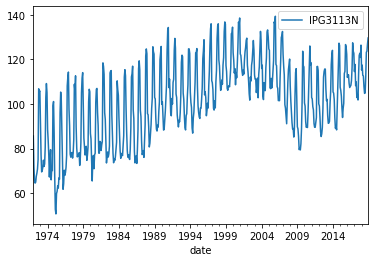

In [1]:
# Load in the time series
candy = pd.read_csv('candy_production.csv', 
                 index_col='date', 
                 parse_dates=True)

# Plot and show the time series on axis ax1
fig, ax1 = plt.subplots()
candy.plot(ax=ax1)
plt.show()

# Train-test splits
In this exercise you are going to take the candy production dataset and split it into a train and a test set. Like you understood in the video exercise, the reason to do this is so that you can test the quality of your model fit when you are done.

The candy production data set has been loaded in for you as candy already and pyplot has been loaded in as plt.

Instructions
0 XP
Split the time series into train and test sets by slicing with datetime indexes. Take the train set as everything up to the end of 2006 and the test set as everything from the start of 2007.
Make a pyplot axes using the subplots() function.
Use the DataFrame's .plot() method to plot the train and test sets on the axis ax.

Hint
You can select all rows from a DataFrame up to and including the year YYYY using its .loc[:'YYYY'] method.
You can select all rows from a DataFrame starting from the year YYYY using its .loc['YYYY':] method.
You can use the plt.subplots() function without any arguments to create a figure and axis.

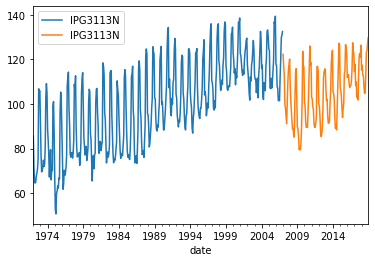

In [2]:
# Split the data into a train and test set
candy_train = candy.loc[:'2006']
candy_test = candy.loc['2007':]

# Create an axis
fig, ax = plt.subplots()

# Plot the train and test sets on the axis ax
candy_train.plot(ax=ax)
candy_test.plot(ax=ax)
plt.show()

# Got It!
1. Making time series stationary
Last time we learned about ways in which a time series can be non-stationary, and how we can identify it by plotting.

2. Overview
However, there are more formal ways of accomplishing this task, with statistical tests. There are also ways to transform non-stationary time series into stationary ones. We'll address both of these in this lesson and then you'll be ready to start modeling.

3. The augmented Dicky-Fuller test
The most common test for identifying whether a time series is non-stationary is the augmented Dicky-Fuller test. This is a statistical test, where the null hypothesis is that your time series is non-stationary due to trend.

4. Applying the adfuller test
We can implement the augmented Dicky-Fuller test using statsmodels. First we import the adfuller function as shown, then we can run it on our time series.

5. Interpreting the test result
The results object is a tuple. The zeroth element is the test statistic, in this case it is -1.34. The more negative this number is, the more likely that the data is stationary. The next item in the results tuple, is the test p-value. Here it's 0.6. If the p-value is smaller than 0.05, we reject the null hypothesis and assume our time series must be stationary. The last item in the tuple is a dictionary. This stores the critical values of the test statistic which equate to different p-values. In this case, if we wanted a p-value of 0.05 or below, our test statistic needed to be below -2.91.

6. Interpreting the test result
We will ignore the rest of the tuple items for now but you can find out more about them here.

1 https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html
7. The value of plotting
Remember that it is always worth plotting your time series as well as doing the statistical tests. These tests are very useful but sometimes they don't capture the full picture.

8. The value of plotting
Remember that Dicky-Fuller only tests for trend stationarity. In this example, although the time series behavior clearly changes, and is non-stationary, it passes the Dicky-Fuller test.

9. Making a time series stationary
So let's say we have a time series that is non-stationary. We need to transform the data into a stationary form before we can model it. You can think of this a bit like feature engineering in classic machine learning.

10. Taking the difference
Let's start with a non-stationary dataset. Here is an example of the population of a city. One very common way to make a time series stationary is to take its difference. This is where, from each value in our time series we subtract the previous value.

11. Taking the difference
We can do this using the dot-diff method of a pandas DataFrame. Notice that this gives us one NaN value at the start since there is no previous value to subtract from it.

12. Taking the difference
We can get rid of this using the dot-dropna method.

13. Taking the difference
Here is the time series after differencing. This time, taking the difference was enough to make it stationary, but for other time series we may need to take the difference more than once.

14. Other transforms
Sometimes we will need to perform other transformations to make the time series stationary. This could be to take the log, or the square root of a time series, or to calculate the proportional change. It can be hard to decide which of these to do, but often the simplest solution is the best one.

15. Let's practice!
You've learned how to test for stationarity and make time series stationary. Now let's practice!

# Augmented Dicky-Fuller
In this exercise you will run the augmented Dicky-Fuller test on the earthquakes time series to test for stationarity. You plotted this time series in the last exercise. It looked like it could be stationary, but earthquakes are very damaging. If you want to make predictions about them you better be sure.

Remember that if it were not stationary this would mean that the number of earthquakes per year has a trend and is changing. This would be terrible news if it is trending upwards, as it means more damage. It would also be terrible news if it were trending downwards, it might suggest the core of our planet is changing and this could have lots of knock on effects for us!

The earthquakes DataFrame has been loaded in for you as earthquake.

Instructions
0 XP
Import the augmented Dicky-Fuller function adfuller() from statsmodels.
Run the adfuller() function on the 'earthquakes_per_year' column of the earthquake DataFrame and assign the result to result.
Print the test statistic, the p-value and the critical values.

Hint
The adfuller() function is found within statsmodels.tsa.stattools.
You need to pass a pandas series to the adfuller() function.
Try printing all of result. The test statistic should be a negative number, the p-value should be between 0 and 1 and the critical values are in a dictionary.

In [16]:
earthquake = pd.read_csv('earthquakes.csv',parse_dates=True,index_col='date')
earthquake.drop('Year',axis=1,inplace=True)

In [17]:
# Import augmented dicky-fuller test function
from statsmodels.tsa.stattools import adfuller

# Run test
result = adfuller(earthquake['earthquakes_per_year'])

# Print test statistic
print(result[0])

# Print p-value
print(result[1])

# Print critical values
print(result[4]) 

-3.1831922511917816
0.020978425256003668
{'1%': -3.5003788874873405, '5%': -2.8921519665075235, '10%': -2.5830997960069446}


# Taking the difference
In this exercise, you will to prepare a time series of the population of a city for modeling. If you could predict the growth rate of a city then it would be possible to plan and build the infrastructure that the city will need later, thus future-proofing public spending. In this case the time series is fictitious but its perfect to practice on.

You will test for stationarity by eye and use the Augmented Dicky-Fuller test, and take the difference to make the dataset stationary.

The DataFrame of the time series has been loaded in for you as city and the adfuller() function has been imported.

Instructions 1/3
1 XP
1
Run the augmented Dicky-Fuller on the 'city_population' column of city.
Print the test statistic and the p-value.

Hint
Remember that you have to pass only one column of the DataFrame into the adfuller() function.
Remember that the 0th element returned by the adfuller() function is the test statistic and the 1st element is the p-value.

In [22]:
city_population = [1.0, 0.9602850939769136, 0.9571667849593926, 0.946927988738166, 0.9877409317977022, 0.9732015631279428, 1.0230108497507344, 0.9963900623086522, 1.013680236136639, 1.0085281773477226, 1.03946326939634, 0.9871848282165128, 1.0203922660390892, 1.0299685677332364, 1.047580326099237, 1.070889417361432, 1.1007746120584458, 1.0720478260511144, 1.0563940071572848, 1.0751611870403996, 1.1064780828479466, 1.0988377923066721, 1.136945747293949, 1.0841774796233346, 1.1564985280788178, 1.1510550642534272, 1.1483951533420242, 1.185148231258958, 1.2181334617317432, 1.1794646347355342, 1.1976859434636962, 1.1950629598700362, 1.2072296605727737, 1.2350045585076357, 1.2697825813443782, 1.27078762049475, 1.2777070472131289, 1.3084936180750049, 1.3358010672621852, 1.354077893884772, 1.3262729301214082, 1.364932993005774, 1.3862386103107658, 1.4130674286055116, 1.3910373653165735, 1.4358644210356395, 1.4226269445019368, 1.4455952942543917, 1.4341915309796214, 1.4649748153934676, 1.4716456556174249, 1.5131658562974382, 1.5006079322818426, 1.58040051400507, 1.576444005200072, 1.544063361172752, 1.57037474054556, 1.6218797146087618, 1.6233178315564696, 1.647758454518224, 1.653114335316591, 1.6623857762561205, 1.7100562201455438, 1.7115683808592754, 1.7287272553647055, 1.7648366699298896, 1.7725488010112511, 1.80527212117056, 1.8263335367976303, 1.8638181476657, 1.9081975720237807, 1.8808768558386053, 1.9160429533524503, 1.9442671382052836, 1.895477040525527, 1.9887442484257305, 1.982908371738446, 2.032156357897005, 2.0230469558569504, 2.0338624751521284, 2.1023153229943747, 2.130295841479632, 2.1006296918184284, 2.139384604484385, 2.157854813786065, 2.187863362453468, 2.1844998386209555, 2.231451430119331, 2.2383596800092285, 2.2945310645116304, 2.3177553294828344, 2.308790137668028, 2.3735964520291617, 2.387101755627404, 2.4168029630760826, 2.4413866747638315, 2.4752568878582624, 2.550677103631745, 2.5243869373754753, 2.557577387804204]
dates = ['09/30/1969', '03/31/1970', '09/30/1970', '03/31/1971', '09/30/1971', '03/31/1972', '09/30/1972', '03/31/1973', '09/30/1973', '03/31/1974', '09/30/1974', '03/31/1975', '09/30/1975', '03/31/1976', '09/30/1976', '03/31/1977', '09/30/1977', '03/31/1978', '09/30/1978', '03/31/1979', '09/30/1979', '03/31/1980', '09/30/1980', '03/31/1981', '09/30/1981', '03/31/1982', '09/30/1982', '03/31/1983', '09/30/1983', '03/31/1984', '09/30/1984', '03/31/1985', '09/30/1985', '03/31/1986', '09/30/1986', '03/31/1987', '09/30/1987', '03/31/1988', '09/30/1988', '03/31/1989', '09/30/1989', '03/31/1990', '09/30/1990', '03/31/1991', '09/30/1991', '03/31/1992', '09/30/1992', '03/31/1993', '09/30/1993', '03/31/1994', '09/30/1994', '03/31/1995', '09/30/1995', '03/31/1996', '09/30/1996', '03/31/1997', '09/30/1997', '03/31/1998', '09/30/1998', '03/31/1999', '09/30/1999', '03/31/2000', '09/30/2000', '03/31/2001', '09/30/2001', '03/31/2002', '09/30/2002', '03/31/2003', '09/30/2003', '03/31/2004', '09/30/2004', '03/31/2005', '09/30/2005', '03/31/2006', '09/30/2006', '03/31/2007', '09/30/2007', '03/31/2008', '09/30/2008', '03/31/2009', '09/30/2009', '03/31/2010', '09/30/2010', '03/31/2011', '09/30/2011', '03/31/2012', '09/30/2012', '03/31/2013', '09/30/2013', '03/31/2014', '09/30/2014', '03/31/2015', '09/30/2015', '03/31/2016', '09/30/2016', '03/31/2017', '09/30/2017', '03/31/2018', '09/30/2018', '03/31/2019']
df = {'date':dates,'city_population':city_population}
city = pd.DataFrame(df)
city.set_index('date',inplace=True)
city.index = pd.to_datetime(city.index)

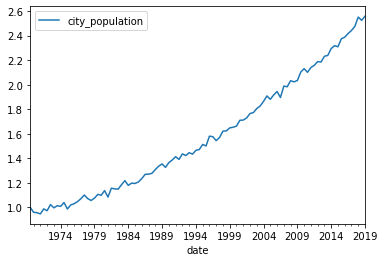

ADF Statistic: 5.297698878151181
p-value: 1.0


In [23]:
# Run the ADF test on the time series
result = adfuller(city['city_population'])

# Plot the time series
fig, ax = plt.subplots()
city.plot(ax=ax)
plt.show()

# Print the test statistic and the p-value
print('ADF Statistic:', result[0])
print('p-value:', result[1])

Take the first difference of city dropping the NaN values. Assign this to city_stationary and run the test again.

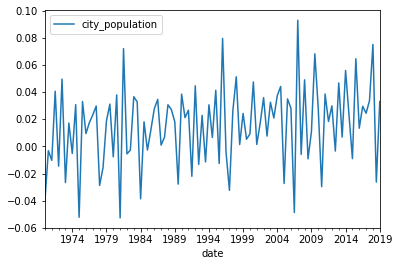

ADF Statistic: -0.81462116461822
p-value: 0.8147894381484755


In [24]:
# Calculate the first difference of the time series
city_stationary =  city.diff().dropna()

# Run ADF test on the differenced time series
result = adfuller(city_stationary['city_population'])

# Plot the differenced time series
fig, ax = plt.subplots()
city_stationary.plot(ax=ax)
plt.show()

# Print the test statistic and the p-value
print('ADF Statistic:', result[0])
print('p-value:', result[1])

Take the second difference of city, by applying the .diff() method twice and drop the NaN values.

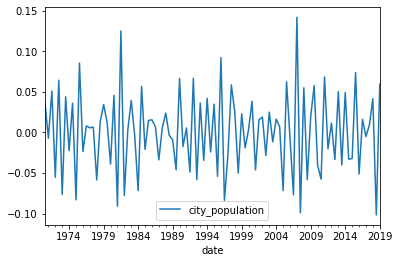

ADF Statistic: -6.433646032918784
p-value: 1.6734498510396606e-08


In [25]:
# Calculate the second difference of the time series
city_stationary = city.diff().diff().dropna()

# Run ADF test on the differenced time series
result = adfuller(city_stationary['city_population'])

# Plot the differenced time series
fig, ax = plt.subplots()
city_stationary.plot(ax=ax)
plt.show()

# Print the test statistic and the p-value
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Other tranforms
Differencing should be the first transform you try to make a time series stationary. But sometimes it isn't the best option.

A classic way of transforming stock time series is the log-return of the series. This is calculated as follows:

$$
log\_return ( y_t ) = log \left( \frac{y_t}{y_{t-1}} \right)
$$

The Amazon stock time series has already been loaded for you as amazon. You can calculate the log-return of this DataFrame by substituting:

$y_{t-1} \rightarrow$ amazon

$y_{t-1} \rightarrow$ amazon.shift(1)

$log() \rightarrow$ np.log()

In this exercise you will compare the log-return transform and the first order difference of the Amazon stock time series to find which is better for making the time series stationary.

Instructions 1/2
50 XP
1
2
Calculate the first difference of the time series amazon to test for stationarity and drop the NaNs.


In [30]:
amazon = pd.read_csv('amazon_close.csv',parse_dates=True,index_col=0)

In [31]:
# Calculate the first difference and drop the nans
amazon_diff = amazon.diff()
amazon_diff = amazon_diff.dropna()

# Run test and print
result_diff = adfuller(amazon_diff['close'])
print(result_diff)

(-7.2035794888112425, 2.331271725487213e-10, 23, 1234, {'1%': -3.435660336370594, '5%': -2.863885022214541, '10%': -2.568018522153254}, 10764.626718933836)


Calculate the log return on the stocks time series amazon to test for stationarity.



In [32]:
# Calculate the first difference and drop the nans
amazon_diff = amazon.diff()
amazon_diff = amazon_diff.dropna()

# Run test and print
result_diff = adfuller(amazon_diff['close'])
print(result_diff)

# Calculate log-return and drop nans
amazon_log = np.log(amazon/amazon.shift(1))
amazon_log = amazon_log.dropna()

# Run test and print
result_log = adfuller(amazon_log['close'])
print(result_log)

(-7.2035794888112425, 2.331271725487213e-10, 23, 1234, {'1%': -3.435660336370594, '5%': -2.863885022214541, '10%': -2.568018522153254}, 10764.626718933836)


NameError: name 'np' is not defined